# Encontrando Mercados para Anunciar

Uma empresa de cursos online oferece cursos de programação. A maioria de seus cursos é sobre desenvolvimento web e mobile, mas eles também trabalham com outros domínios como Data Science, desenvolvimento de jogos, etc.

O produto é vendido mo modelo de subscriptions com um preço mensal de US$59.

A empresa quer promover o produto e investir em propagandas. Nosso objetivo nesse projeto é encontrar os dois melhores mercados para a empresa anunciar.

O cenário ideal seria realizar uma pesquisa de mercado, mas isso está fora do orçamento da empresa, pois envolveria a pesquisa em vários países. Diante disso, utilizaremos um data set criado pela freeCodeCamp.

A freeCodeCamp é uma empresa de cursos online gratuitos. Uma vez que eles possuem uma grande audiência, especialmente no Medium, conseguem realizar uma pesquisa anual bastante abrangente sobre o perfil de sua audiência e seus hábitos no aprendizado da programação.

O data set que utilizaremos teve origem na pesquisa New Coder Survey da freeCodeCamp, realizada em 2017. O data set pode ser encontrado [aqui](https://github.com/freeCodeCamp/2017-new-coder-survey).

In [13]:
#importando as bibliotecas que serão utilizadas ao longo do projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
#configurando para que os avisos do jupyter sejam ignorados, apenas para fins estéticos do projeto
warnings.filterwarnings('ignore')

#configurando o formato de exibição das tabelas ao longo do projeto 
pd.options.display.max_columns=None
pd.options.display.width=None

#lendo o arquivo CSV para um objeto do tipo DataFrame
df = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

## Conhecendo o data set

Nesse primeiro momento iremos explorar um pouco o data set para conhece-lo.

Faremos uma análise inicial para verificar se ele realmente será útil para nosso projeto, especialmente considerando os interesses das pessoas que responderam à pesquisa.

In [14]:
#exibindo informações básicas do data set para iniciar a exploração dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [15]:
#exibindo as primeiras 5 linhas do data set
df.head(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

Identificamos uma coluna que pode ser muito interessante de ser analisada. A coluna "JobRoleInterest" descreve qual área da programação é de interesse profissional do entrevistado. Vamos explorar essa coluna para entender se os entrevistados nesse data set são relevantes para nosso projeto.

In [16]:
#cria uma tabela de frequência da coluna JobRoleInterest. O parâmetro normalize apresenta os valores em termos relativos
df['JobRoleInterest'].value_counts(normalize=True)

Full-Stack Web Developer                                                                                                                   0.117706
  Front-End Web Developer                                                                                                                  0.064359
  Data Scientist                                                                                                                           0.021739
Back-End Web Developer                                                                                                                     0.020309
  Mobile Developer                                                                                                                         0.016733
                                                                                                                                             ...   
Data Engineer,   Data Scientist,   DevOps / SysAdmin                                                            

## Explorando as áreas de interesse dos entrevistados

Analisando a coluna JobRoleInterest percebemos que a pergunta que deu origem à coluna na pesquisa provavelmente era de livre preenchimento. Com isso, as respostas dos usuários nem sempre seguiram o mesmo padrão, com áreas iguais sendo descritas com nomes diferentes.

Além disso, muitos entrevistados responderam várias áreas diferentes na mesma resposta.

Pode ser interessante descobrir quantas vezes uma área foi mencionada independentemente se isoladamente ou em conjunto com outras áreas.

In [17]:
#substindo os valores nulos por 'no answer'
df['JobRoleInterest'] = df['JobRoleInterest'].fillna('No Answer')
#transformando todos os valores para o tipo string
df['JobRoleInterest'] = df['JobRoleInterest'].astype(str)
#transformando os valores em listas separadas pela vírgula
df['JobRoleInterest'] = df['JobRoleInterest'].apply(
    lambda x: str(x).split(','))
print(type(df.loc[1,'JobRoleInterest']))
df['JobRoleInterest'].head(10)

<class 'list'>


0                                          [No Answer]
1                           [Full-Stack Web Developer]
2    [  Front-End Web Developer,  Back-End Web Deve...
3    [  Front-End Web Developer,  Full-Stack Web De...
4    [Full-Stack Web Developer,  Information Securi...
5                                          [No Answer]
6                           [Full-Stack Web Developer]
7                                          [No Answer]
8                                          [No Answer]
9    [Full-Stack Web Developer,    Quality Assuranc...
Name: JobRoleInterest, dtype: object

In [18]:
#retirando os espaços em branco antes de cada nome de área
def strip_list(l):
    return [i.strip() for i in l]
df['JobRoleInterest'] = df['JobRoleInterest'].apply(strip_list)


In [19]:
roles = []
#para cada linha, faremos uma iteração por cada item e adicionaremos esse item à lista 'roles' se ele não estiver na lista
def find_roles(l):
    for i in l:
        if i not in roles:
            roles.append(i)

df['JobRoleInterest'].apply(find_roles)
roles

['No Answer',
 'Full-Stack Web Developer',
 'Front-End Web Developer',
 'Back-End Web Developer',
 'DevOps / SysAdmin',
 'Mobile Developer',
 'Information Security',
 'Quality Assurance Engineer',
 'Game Developer',
 'User Experience Designer',
 'Data Scientist',
 'Data Engineer',
 'Product Manager',
 'Ethical Hacker',
 'security expert',
 'Technical Writer',
 'Researcher',
 'Systems Engineer',
 'Desktop Applications Programmer',
 'Robotics',
 'Non technical',
 'UI Design',
 'Software engineer',
 'email coder',
 'Data analyst',
 'I dont yet know',
 'UX developer/designer',
 'support scientific resaerch',
 'AI and neuroscience',
 'Full Stack Software Engineer',
 'Program Manager',
 'Application Support Analyst',
 "This futurist's dream of using some tech in a way that inspires critical amounts of people to influence the changes we need to protect",
 'Information Architect',
 'Physicist',
 'Security Business Analyst',
 'Bioinformatics/science',
 'creative coder / generative artist/design

In [20]:
role_count = {}
'''
faremos a contagem de quantas vezes cada área aparece nas respostas, 
criando um dicionário onde a chave é área e o valor o número de vezes que a área foi mencionada
'''
for i in roles:
    cnt = 0
    for j in df['JobRoleInterest']:
        if i in j:
            cnt = cnt + 1
    role_count[i] = cnt
role_count

{'No Answer': 11183,
 'Full-Stack Web Developer': 4198,
 'Front-End Web Developer': 3533,
 'Back-End Web Developer': 2772,
 'DevOps / SysAdmin': 927,
 'Mobile Developer': 2304,
 'Information Security': 1326,
 'Quality Assurance Engineer': 498,
 'Game Developer': 1628,
 'User Experience Designer': 1469,
 'Data Scientist': 1643,
 'Data Engineer': 1248,
 'Product Manager': 814,
 'Ethical Hacker': 2,
 'security expert': 1,
 'Technical Writer': 1,
 'Researcher': 2,
 'Systems Engineer': 1,
 'Desktop Applications Programmer': 1,
 'Robotics': 1,
 'Non technical': 1,
 'UI Design': 1,
 'Software engineer': 4,
 'email coder': 1,
 'Data analyst': 1,
 'I dont yet know': 1,
 'UX developer/designer': 1,
 'support scientific resaerch': 1,
 'AI and neuroscience': 1,
 'Full Stack Software Engineer': 1,
 'Program Manager': 1,
 'Application Support Analyst': 1,
 "This futurist's dream of using some tech in a way that inspires critical amounts of people to influence the changes we need to protect": 1,
 'In

In [21]:
#transformando o dicionário em um objeto do tipo Series
roles_freq = pd.Series(role_count)
#selecionando apenas as 10 áreas mais mencionadas
top_10_roles = roles_freq.sort_values(ascending=False).head(10)

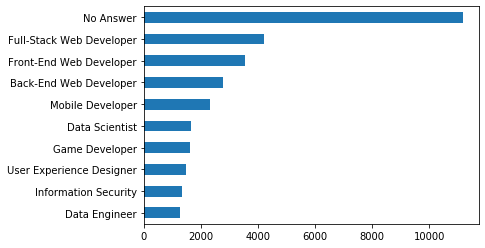

In [22]:
%matplotlib inline
top_10_roles.sort_values(ascending=True).plot.barh()

Analisando o gráfico acima percebemos que muitos entrevistados não responderam à pergunta, mas também conseguimos verificar as 09 áreas mais mencionadas como de interesse. Web Development e Mobile Development aparecem nas primeiras posições. Isso é muito interessante para nosso projeto, tendo em vista que a empresa tem como foco exatamente cursos nessas duas áreas.

## Descobrindo onde as pessoas estão

Como estamos tentando descobrir os dois melhores mercados para anunciar o nosso produto, precisamos entender em que países estão localizados os entrevistados e extrair conhecimento dessa informação.

Para garantir que estamos trabalhando com informações de pessoas realmente interessadas em se desenvolver na área, vamos excluir as linhas em que os usuários não responderam qual sua área de interesse profssional.

In [23]:
#função que verifica se o valor é 'no answer'
def delete_no_answer(l):
    if 'No Answer' in l:
        return 1
    else:
        return 0
#cria  uma coluna para ser utilizada como filtro aplicando a função criada
df['Null_Role'] = df['JobRoleInterest'].apply(delete_no_answer)

#seleciona apenas as linhas com resposta para a pergunta JobRoleInterest
df = df.loc[df['Null_Role'] == 0]

In [24]:
df.shape

(6992, 137)

In [25]:
#apresenta os 20 países mais marcados como países de residência 
df['CountryLive'].value_counts().head(20)

United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Serbia                             52
Philippines                        52
Greece                             46
Ireland                            43
Name: CountryLive, dtype: int64

In [26]:
#apresenta a distribuição dos países de residência em termos percentuais
df['CountryLive'].value_counts(normalize=True).head(20) * 100

United States of America         45.700497
India                             7.721556
United Kingdom                    4.606610
Canada                            3.802281
Poland                            1.915765
Brazil                            1.886517
Germany                           1.828020
Australia                         1.637906
Russia                            1.491664
Ukraine                           1.301550
Nigeria                           1.228429
Spain                             1.126060
France                            1.096812
Romania                           1.038315
Netherlands (Holland, Europe)     0.950570
Italy                             0.906698
Serbia                            0.760456
Philippines                       0.760456
Greece                            0.672711
Ireland                           0.628839
Name: CountryLive, dtype: float64

Baseado nos resultados, percebe-se que os EUA são o mercado mais relevante com mais de 45% dos entrevistados declarando residir no país. Índia é o segundo colocado com quase 8%, seguido pelo Reino Unido com 4.6%.

Para definir os melhores mercados precisamos levar em consideração o tamanho do mercado, a facilidade de penetração nesse mercado, bem como o poder de investimento das pessoas naquele mercado.

Diante disso, estreitaremos nossa análise para os quatro países com o maior número de respostas. De acordo com o data set, são os quatro maiores mercados. Também são quatro países que falam inglês, mesma língua utilizada nos cursos comercializados pela nossa empresa, o que facilita a penetração no país.

## Descobrindo a capacidade de investimento em cada mercado

Como dito anteriormente, um dos fatores mais relevantes para a definição dos melhores mercados é o quanto as pessoas estão dispostas a investir no estudo de programação. Faremos essa análise daqui em diante.

Como trabalhamos em um modelo de subscription mensal, identificamos duas colunas que podem ser úteis em nossa análise. A coluna 'MoneyForLearning' apresenta quanto aquele entrevistado já investiu no estudo de programação. Já a coluna 'MonthsProgramming' mostra há quanto tempo a pessoa está estudando programação. 

Dividindo uma coluna pela outra, encontraremos o valor mensal que o entrevistado gasta com estudo de programação.

In [27]:
#exibindo os valores respondidos pelos entrevistados ordenando pelo index
df['MonthsProgramming'].value_counts().sort_index()

0.0      235
1.0      767
2.0      669
3.0      637
4.0      367
        ... 
360.0      5
370.0      1
408.0      1
480.0      2
744.0      4
Name: MonthsProgramming, Length: 91, dtype: int64

In [28]:
#para evitar uma divisão por zero, substituiremos os valores zero por um
df['MonthsProgramming'] = df['MonthsProgramming'].apply(
    lambda x: 1 if x == 0 else x)
df['MonthsProgramming'].value_counts().sort_index()

1.0      1002
2.0       669
3.0       637
4.0       367
5.0       279
         ... 
360.0       5
370.0       1
408.0       1
480.0       2
744.0       4
Name: MonthsProgramming, Length: 90, dtype: int64

In [29]:
#criando uma coluna com o resultado da divisão de moneyforlearning e monthsprogramming
df['Monthly_money'] = df['MoneyForLearning'] / df['MonthsProgramming']

In [30]:
#verificando a distribuição dos valores na nova coluna, incluindo valores nulos e ordenando pelo index
df['Monthly_money'].value_counts(dropna=False).sort_index()

0.000000        3092
0.033333           1
0.050000           1
0.055556           1
0.066667           1
                ... 
30000.000000       1
40000.000000       1
50000.000000       1
80000.000000       1
NaN              675
Name: Monthly_money, Length: 494, dtype: int64

In [31]:
#deletando linhas com valores nulos
df = df.loc[df['Monthly_money'].notna()]
df['Monthly_money'].value_counts(dropna=False).sort_index()

0.000000        3092
0.033333           1
0.050000           1
0.055556           1
0.066667           1
                ... 
20000.000000       2
30000.000000       1
40000.000000       1
50000.000000       1
80000.000000       1
Name: Monthly_money, Length: 493, dtype: int64

In [32]:
#verificando o número de linhas e colunas para certificar que as linhas foram excluídas
df.shape

(6317, 138)

In [33]:
#excluindo linhas em que o país de residência não foi informado
df = df.loc[df['CountryLive'].notna()]
df.shape


(6212, 138)

In [34]:
#selecionando os quatro países que escolhemos trabalhar
countries = df['CountryLive'].value_counts().head(4).index.tolist()

#criando um novo DataFrame apenas com esses países
df_4_countries = df.loc[df['CountryLive'].isin(countries)]

In [35]:
#agrupando as médias da coluna 'monthly_money' por cada país
df_4_countries.groupby('CountryLive')['Monthly_money'].mean()

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    227.997996
Name: Monthly_money, dtype: float64

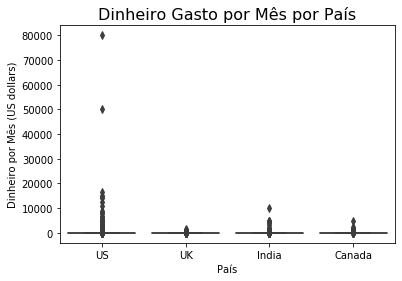

In [37]:
#criando gráfico Boxplot para verificar a distribuição dos valores para cada país
import seaborn as sns
sns.boxplot(y = 'Monthly_money', x = 'CountryLive',
            data = df_4_countries)
plt.title('Dinheiro Gasto por Mês por País',
         fontsize = 16)
plt.ylabel('Dinheiro por Mês (US dollars)')
plt.xlabel('País')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

Verificamos que muitos outliers impedem a vizaulização da distribuição de forma que possamos extrair alguma informação.

De início, verificamos dois outliers extremos nos EUA, indicando um gasto mensal de 50k e 80k com estudo de programação. Apesar de não ser impossível, é bastante improvável que esses valores estejam corretos. Vamos excluir essas linhas.

Depois disso, continuaremos analisando os outros outliers.

In [39]:
#excluindo linhas com gastos mensais superiores à 20k
df_4_countries = df_4_countries[df_4_countries['Monthly_money'] < 20000]

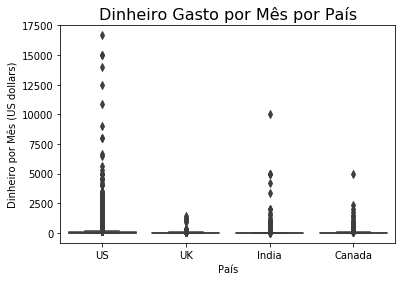

In [40]:
#criando gráfico Boxplot para verificar a distribuição dos valores para cada país
sns.boxplot(y = 'Monthly_money', x = 'CountryLive',
            data = df_4_countries)
plt.title('Dinheiro Gasto por Mês por País',
         fontsize = 16)
plt.ylabel('Dinheiro por Mês (US dollars)')
plt.xlabel('País')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

In [43]:
#extraindo os outliers dos EUA que estão com gasto acima de 6k para analisar mais detalhadamente se os valores fazem sentido
usa_outliers = df_4_countries[
    (df_4_countries['CountryLive'] == 'United States of America') &
    (df_4_countries['Monthly_money'] >= 6000)
]

usa_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Null_Role,Monthly_money
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"[User Experience Designer, Full-Stack Web Deve...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"[Front-End Web Developer, Mobile Developer, Us...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,

Muitos dos outliers são justificáveis porque eles fizeram bootcamps. Bootcamps são cursos intensivos de formação de programadores que normalmente são bastante caros. Os que apresentam gasto elevado com estudo, mas não participaram de bootcamps serão excluídos, já que não faz muito sentido o elevado valor.

Além disso, dos que atenderam bootcamps mas estão estudando por 3 meses ou menos, é bastante improvável que irão investir em outros cursos, uma vez que bootcamps normalmente demoram mais de 3 meses. Vamos excluir essas linhas também.

In [45]:
#selecionando as linhas em que os outliers não fizeram bootcamps
usa_no_boot = df_4_countries[
    (df_4_countries['CountryLive'] == 'United States of America') &
    (df_4_countries['AttendedBootcamp'] == 0) &
    (df_4_countries['Monthly_money'] >= 6000)
]

#excluindo essas linhas utilizando o index como identificador
df_4_countries = df_4_countries.drop(usa_no_boot.index)

In [46]:
#selecionando os outliers que estudaram por menos de 3 meses
usa_less_3 = df_4_countries[
    (df_4_countries['CountryLive'] == 'United States of America') &
    (df_4_countries['MonthsProgramming'] <= 3) &
    (df_4_countries['Monthly_money'] >= 6000)
]

#excluindo linhas utilizando o index
df_4_countries = df_4_countries.drop(usa_less_3.index)

In [47]:
#selecionando os outliers da Índia para uma melhor análise
india_outliers = df_4_countries[
    (df_4_countries['CountryLive'] == 'India') &
    (df_4_countries['Monthly_money'] >= 2500)
]

india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Null_Role,Monthly_money
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"[User Experience Designer, Mobile Developer, P...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"[Information Security, Full-Stack Web Develope...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,

Nenhum dos outliers na Índia frequentaram algum bootcamp. Diante disso, é difícil entender o motivo de terem gasto tanto dinheiro estudando programação. Muito provavelmente eles incluíram aí informações sobre gastos com faculdade, o que não foi solicitado na pesquisa.

Vamos retirar esses outliers do data set.

In [48]:
#excluindo os outliers da Índia com base no index
df_4_countries = df_4_countries.drop(india_outliers.index)

No Canadá, temos um outlier extremo que indicou gastar mais de 5 mil dólares por mês. Vamos analisar suas respostas para verificar se há motivo.

In [49]:
#selecionando o outlier do Canadá
canada_outlier = df_4_countries[
    (df_4_countries['CountryLive'] == 'Canada') &
    (df_4_countries['Monthly_money'] >= 5000)
]

canada_outlier

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Null_Role,Monthly_money
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"[Mobile Developer, Full-Stack Web Developer, D...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0,5000.0


Ele declarou ter feito um bootcamp e está estudando por apenas 02 meses. Isso indica que ele gastou um valor relevante no bootcamp e provavelmente não investirá mais pelos próximos meses, assim como nos casos dos EUA.

Vamos excluir esse outlier.

In [50]:
#excluindo outlier com base no index
df_4_countries = df_4_countries.drop(canada_outlier.index)

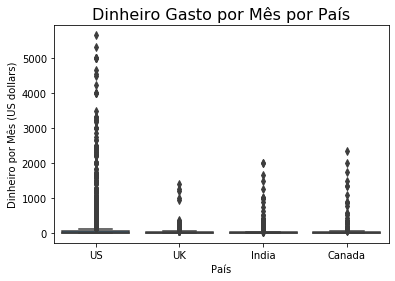

In [51]:
#criando gráfico Boxplot para verificar a distribuição dos valores para cada país
sns.boxplot(y = 'Monthly_money', x = 'CountryLive',
            data = df_4_countries)
plt.title('Dinheiro Gasto por Mês por País',
         fontsize = 16)
plt.ylabel('Dinheiro por Mês (US dollars)')
plt.xlabel('País')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

In [52]:
df_4_countries.groupby('CountryLive').mean()['Monthly_money']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: Monthly_money, dtype: float64

O gráfico de distribuição ainda tem sua vizualiação prejudicada em virtude dos outliers. Contudo, conseguimos eliminar aqueles outliers que julgamos não-representativos para nossa análise. 

Chegamos so final dessa etapa com a média de gastos mensal por país que consideramos representativa.

## Escolhendo o Melhor Mercado

Nesse ponto, a primeira escolha óbvia são os Estados Unidos. É o país com a mais representatividade em nosso data set e que demonstra uma propensão em investir muito acima dos demais países com uma média de gasto mensal com aprendizado em programação de 142 dólares.

A segunda escolha pode parecer ser óbvia, mas não é. O Canadá apresenta uma média de despesas com aprendizado em programação elevada (93 dólares), mas acreditamos que a melhor escolha tem que levar em consideração também o número de potenciais clientes.

In [54]:
#apresentando a frequência de cada país em termos percentuais
df_4_countries['CountryLive'].value_counts(normalize=True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

Analisando a tabela de frequência acima, podemos ver que a Índia tem quase o dobro de clientes potenciais em relação ao Canadá.

Como o valor do nosso produto é de 59 dólares por mês e a média de gasto com aprendizado em programação na Índia é de 65 dólares, devemos considerar o país asiático como uma opção relevante.

## Conclusão

Com base na análise feita, concluímos que os USA devem ser o foco principal da verba de marketing para nosso produto.

O segundo país a ser escolhido pode ser tanto o Canadá quanto a Índia. Caso a equipe de marketing esteja flexível para aceitar a divulgação em 03 países ao invés de 02, nossa sugestão seria focar grande parte da verba nos EUA (60% da verba) e dividir o restante entre Índia e Canadá (20% para cada).

Se tivermos de realmente fazer uma escolha entre Índia e Canadá, nossa sugestão seria escolher a Índia, tendo em vista o número de potenciais clientes.